In [59]:
import numpy as np
import pandas as pd
import os

# Surpress warnings
import warnings
warnings.filterwarnings('ignore')

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Imputer for handling missing values
from sklearn.preprocessing import Imputer

# For polynomial feature engineering
from sklearn.preprocessing import PolynomialFeatures

In [60]:
print(os.listdir("data/"))

['.DS_Store', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [61]:
# Training data
app_train = pd.read_csv("data/application_train.csv")
print("Training data shape: ", app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


###### The training data has 307511 observations (each one a separate loan) and 122 features

In [62]:
# Testing data
app_test = pd.read_csv("data/application_test.csv")
print("Testing data shape: ", app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


###### The testing data has 48744 observations and 121 features (Without Target feature)

### EDA

##### Let's look at the Target column

In [63]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

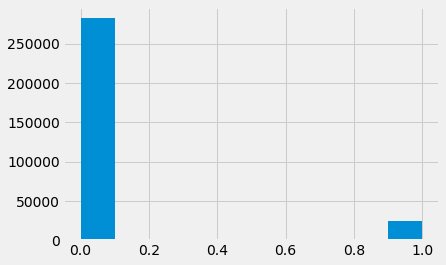

In [64]:
app_train['TARGET'].astype(int).hist();

#### Missing Values

In [65]:
def find_missing_values(df):
    # Total missing values
    mis_values_col_count = df.isnull().sum()
    
    # Percentage of missing values
    mis_values_percent = 100 * df.isnull().sum() / len(df)
    
    # Construct DF with the results
    mis_values_df = pd.concat([mis_values_col_count, mis_values_percent], axis = 1)
    
    # Rename the columns
    mis_values_df_column_names = mis_values_df.rename(columns = {0 : 'Missing Values', 1: '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_values_df_column_names = mis_values_df_column_names[mis_values_df_column_names.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print("Selected Dataframe has " + str(df.shape[1]) + " columns. \n" "There are " + str(mis_values_df_column_names.shape[0]) + " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_values_df_column_names

In [66]:
# Missing values statistics
missing_values = find_missing_values(app_train)
missing_values.head(20)

Selected Dataframe has 122 columns. 
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [67]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [68]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

#### Encode Categorical Variables

In [69]:
app_train['EMERGENCYSTATE_MODE'].dtype == 'object'

True

###### Label Encoding

In [70]:
# label encoder object
label_encoder = LabelEncoder()
label_encoder_count = 0

# Loop through the columns
for col in app_train.columns:
    if app_train[col].dtype == 'object':
        # Use the label encoding if number of categories are 2 or less
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            label_encoder.fit(app_train[col])
            
            print(col)
            
            # Transform both training and testing data
            app_train[col] = label_encoder.transform(app_train[col])
            app_test[col] = label_encoder.transform(app_test[col])
            label_encoder_count += 1
            
print("%d colums were label encoded" %label_encoder_count)

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
3 colums were label encoded


###### One-hot Encoding

In [71]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print("Training Features shape: ", app_train.shape)
print("Testing Features shape: ", app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


##### Aligning Training and Testing data features

There need to be the same features in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes.

In [72]:
# backup Target from train before aligning
train_target_label = app_train['TARGET']

# Align training and testing data, keep only columns that are present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

print("Training Features shape After Aligning: ", app_train.shape)
print("Testing Features shape After Aligning: ", app_test.shape)

# Add the Target back in
app_train['TARGET'] = train_target_label

print("\n")
print("Training Features shape After Aligning (With Target): ", app_train.shape)
print("Testing Features shape After Aligning: ", app_test.shape)

Training Features shape After Aligning:  (307511, 239)
Testing Features shape After Aligning:  (48744, 239)


Training Features shape After Aligning (With Target):  (307511, 240)
Testing Features shape After Aligning:  (48744, 239)


#### Anomalies

*DAYS_BIRTH*

In [73]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

*DAYS_EMPLOYED*

In [74]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

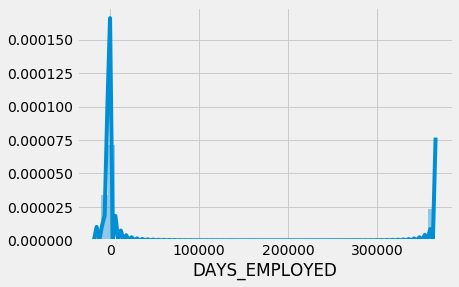

In [75]:
sns.distplot(app_train['DAYS_EMPLOYED']);

In [76]:
# Check whether the above anomalies have an effect on Target

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print("The non-anomalies default on %0.2f%% of loans" % (100 * non_anom['TARGET'].mean()))
print("The anomalies default on %0.2f%% of loans" % (100 * anom['TARGET'].mean()))
print("The are %d anomalies days of employment" % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
The are 55374 anomalies days of employment


Text(0.5,0,'Days Employment')

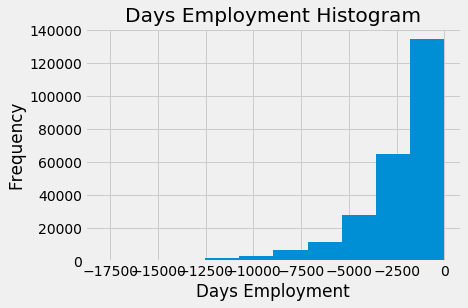

In [77]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replace anomalies with NaN
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [78]:
# Let's do the same transformation on the test data

app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
# Replace anomalies with NaN
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


*CNT_CHILDREN*

In [79]:
app_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

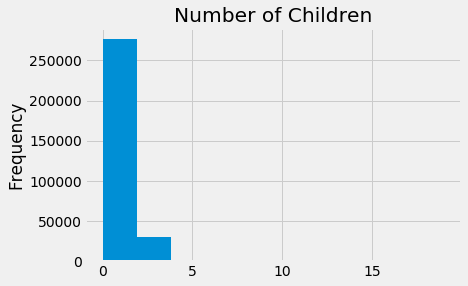

In [80]:
app_train['CNT_CHILDREN'].plot.hist(title ='Number of Children')

In [81]:
anom = app_train[app_train['CNT_CHILDREN'] >= 5]
non_anom = app_train[app_train['CNT_CHILDREN'] < 5]
print("The non-anomalies default on %0.2f%% of loans" % (100 * non_anom['TARGET'].mean()))
print("The anomalies default on %0.2f%% of loans" % (100 * anom['TARGET'].mean()))
print("The are %d anomalies days of employment" % len(anom))

The non-anomalies default on 8.07% of loans
The anomalies default on 12.70% of loans
The are 126 anomalies days of employment


* Same story here, there are some applicants with 19 children. It seems applicants with more childrent are in linear with loan defaults. We do not want to remove these entries (as we did for days employed), however we will consider this fact when we get to the modeling.

*AMT_INCOME_TOTAL*

In [82]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

*AMT_CREDIT*

In [83]:
app_train['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

*AMT_ANNUITY*

In [84]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

*AMT_GOODS_PRICE*

In [85]:
app_train['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

*DAYS_REGISTRATION*

In [86]:
(app_train['DAYS_REGISTRATION'] / -365).describe()

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

#### Correlations

In [87]:
corr_values = app_train.corr()['TARGET'].sort_values()

print("Top 15 positive correlations: \n", corr_values.tail(15))
print("Top 15 negative correlations: \n", corr_values.head(15))

Top 15 positive correlations: 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Top 15 ne

In [88]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.078239308309827449

Text(0,0.5,'Count')

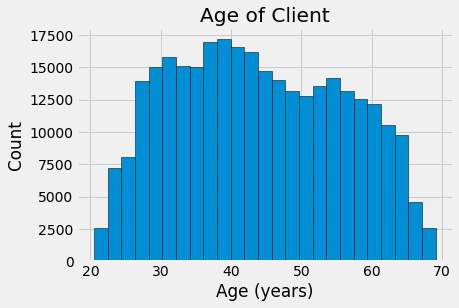

In [89]:
plt.style.use('fivethirtyeight')

plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client');
plt.xlabel('Age (years)')
plt.ylabel('Count')

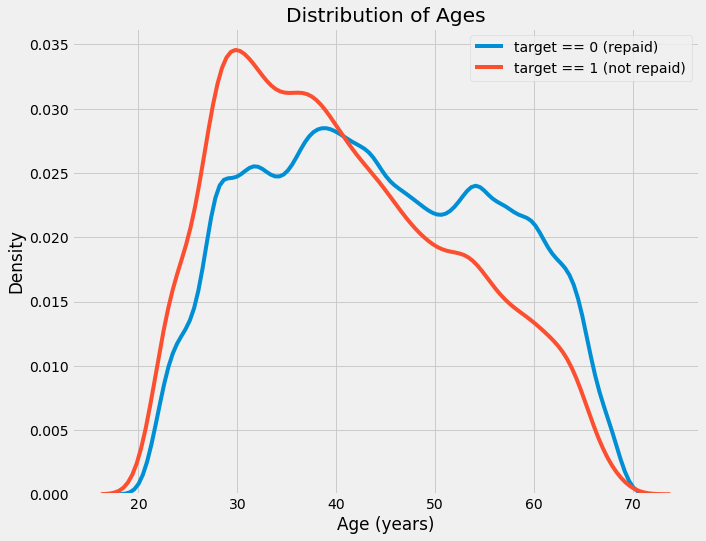

In [90]:
plt.figure(figsize = (10, 8))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0 (repaid)')

sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1 (not repaid)')

plt.xlabel('Age (years)');
plt.ylabel('Density');
plt.title('Distribution of Ages');

##### Above plot indicates that there seems to be a trend in the younger generation 'defaulting' the loan (red line skewed towards the younger generation)

In [91]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH']  = app_train['DAYS_BIRTH'] / 365
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219
5,0,16941,46.413699
6,0,13778,37.747945
7,0,18850,51.643836
8,0,20099,55.065753
9,0,14469,39.641096


In [92]:
# Create bins for age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [93]:
# Group by bins and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5,1,'Failure to repay by Age group')

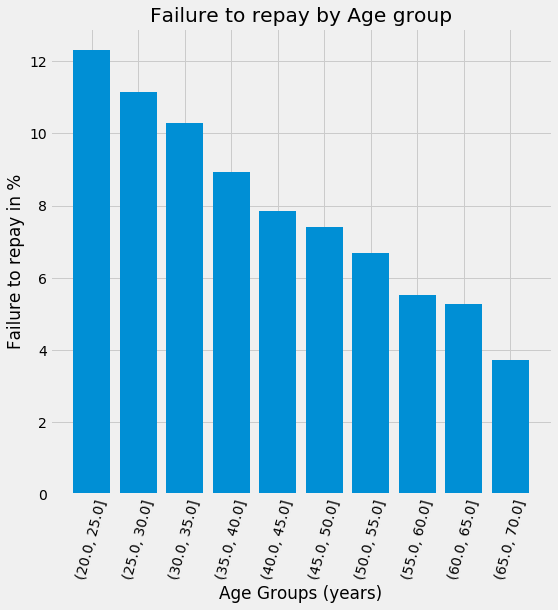

In [94]:
plt.figure(figsize = (8, 8))

# plot the age bins and average target
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

plt.xticks(rotation = 75);
plt.xlabel('Age Groups (years)');
plt.ylabel('Failure to repay in %');
plt.title('Failure to repay by Age group')

##### Exterior Source

In [95]:
# The 3 variables with the strongest negative correlations with the target are 
# EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3

ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5,1,'Correlation Heatmap')

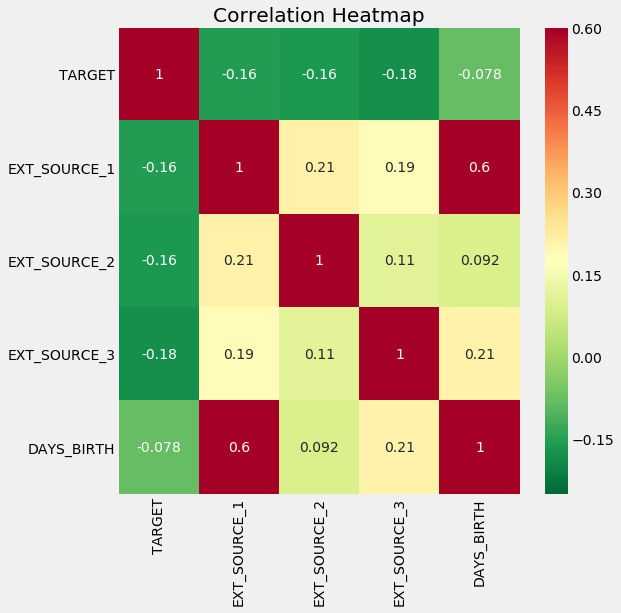

In [96]:
plt.figure(figsize = (8,8))

# correlations heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlGn_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

##### All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan


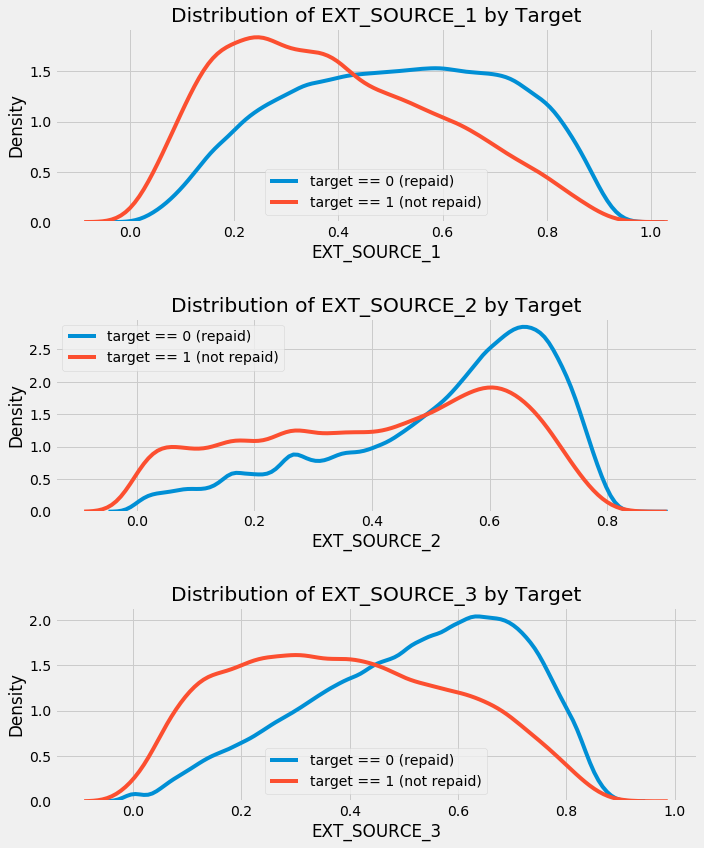

In [97]:
plt.figure(figsize = (10, 12))

for index, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # new subplot
    plt.subplot(3, 1, index + 1)
    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0 (repaid)')
    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1 (not repaid)')
    
    plt.title('Distribution of %s by Target' % source)
    plt.xlabel('%s' % source);
    plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

##### plot 3 and 1 are showing similar trend. I think 3 definitely has some role in predicting the target value, although the correlation is very weak. But we still consider this one as part of the model

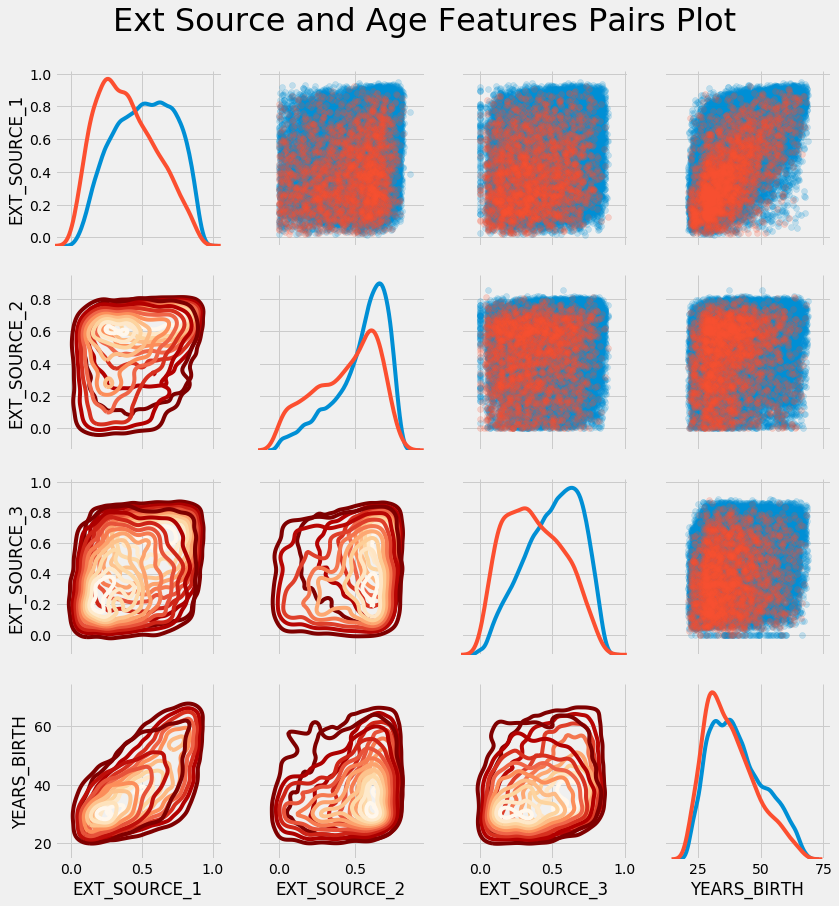

In [98]:
# Pair plots

plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Correlation between two columns
def corr_func(x, y, **kwargs):
    corr = np.corrcoef(x, y)[0][1]
    print(np.corrcoef(x, y)[0][1])
    ax = plt.gca()
    ax.annotate("r = {:2f}".format(r), xy=(.2,.8), xycoords = ax.tranAxes, size = 20)
    
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey = False, 
                    hue = 'TARGET', 
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha = 0.2)

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

## Feature Engineering

In [99]:

# new DF for ploy features
ploy_features_train = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
ploy_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

imputer = Imputer(strategy = 'median')

poly_target = ploy_features_train['TARGET']
ploy_features_train = ploy_features_train.drop(columns = ['TARGET'])

# Impute the missing values
poly_features_train = imputer.fit_transform(ploy_features_train)
poly_features_test = imputer.fit_transform(ploy_features_test)

# polynomial object with degree 3
poly_transformer = PolynomialFeatures(degree = 3)

In [100]:
# Train the polynomial Features
poly_transformer.fit(poly_features_train)

#Transform features
poly_features_train = poly_transformer.transform(poly_features_train)
poly_features_test = poly_transformer.transform(poly_features_test)

print('Polynomial Features Shape: ', poly_features_train.shape)

Polynomial Features Shape:  (307511, 35)


In [101]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [102]:
# Create a dataframe of the features 
poly_features_train = pd.DataFrame(poly_features_train, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features_train['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features_train.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [103]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features_train['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features_train, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


### New Features

*CREDIT_INCOME_PERCENT:* the percentage of the credit amount relative to a client's income

*ANNUITY_INCOME_PERCENT:* the percentage of the loan annuity relative to a client's income

*CREDIT_TERM:* the length of the payment in months (since the annuity is the monthly amount due

*DAYS_EMPLOYED_PERCENT:* the percentage of the days employed relative to the client's age

In [104]:
app_train_new = app_train.copy()
app_test_new = app_test.copy()

In [105]:
app_train_new['CREDIT_INCOME_PERCENT'] = app_train_new['AMT_CREDIT'] / app_train_new['AMT_INCOME_TOTAL']
app_train_new['ANNUITY_INCOME_PERCENT'] = app_train_new['AMT_ANNUITY'] / app_train_new['AMT_INCOME_TOTAL']
app_train_new['CREDIT_TERM'] = app_train_new['AMT_ANNUITY'] / app_train_new['AMT_CREDIT']
app_train_new['DAYS_EMPLOYED_PERCENT'] = app_train_new['DAYS_EMPLOYED'] / app_train_new['DAYS_BIRTH']

In [106]:
app_test_new['CREDIT_INCOME_PERCENT'] = app_test_new['AMT_CREDIT'] / app_test_new['AMT_INCOME_TOTAL']
app_test_new['ANNUITY_INCOME_PERCENT'] = app_test_new['AMT_ANNUITY'] / app_test_new['AMT_INCOME_TOTAL']
app_test_new['CREDIT_TERM'] = app_test_new['AMT_ANNUITY'] / app_test_new['AMT_CREDIT']
app_test_new['DAYS_EMPLOYED_PERCENT'] = app_test_new['DAYS_EMPLOYED'] / app_test_new['DAYS_BIRTH']

### Plot the new features

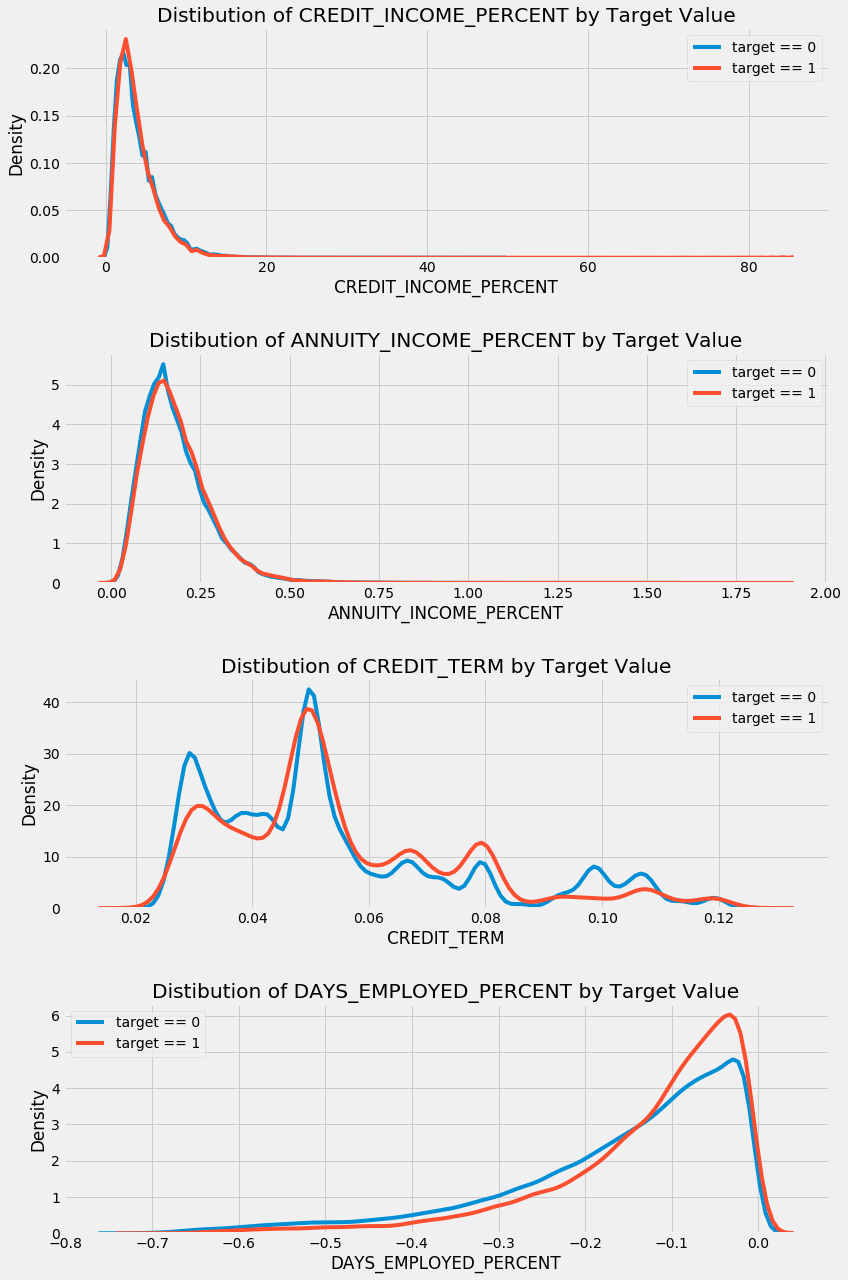

In [107]:
plt.figure(figsize = (12,18))

new_features = ['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

for i, feature in enumerate(new_features):
    plt.subplot(4, 1, i+1)
    # Repaid loans
    sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 0, feature], label = 'target == 0')
    
    # Loans that were defaulted
    sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 1, feature], label = 'target == 1')
    
    plt.title('Distibution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature);
    plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

## Imputation and Feature Scaling

In [108]:
from sklearn.preprocessing import MinMaxScaler, Imputer

In [109]:
# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
features = list(train.columns)

test = app_test.copy()

In [110]:
# Missing values
imputer = Imputer(strategy = 'median')
imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(app_test)

In [111]:
# Scaling
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


## Model - Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose =1, n_jobs = -1)

random_forest.fit(train, train_target_label)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [114]:
randome_forest_feature_imp = random_forest.feature_importances_

randome_forest_feature_importances = pd.DataFrame({'feature': features, 'importance': randome_forest_feature_imp})
randome_forest_feature_importances

,feature,importance
0,SK_ID_CURR,0.030372
1,NAME_CONTRACT_TYPE,0.001824
2,FLAG_OWN_CAR,0.004197
3,FLAG_OWN_REALTY,0.005131
4,CNT_CHILDREN,0.007169
5,AMT_INCOME_TOTAL,0.024464
6,AMT_CREDIT,0.027431
7,AMT_ANNUITY,0.029127
8,AMT_GOODS_PRICE,0.023701
9,REGION_POPULATION_RELATIVE,0.023748


In [115]:
# Predict using test data and select second column (for loan not paid)
rf_predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [118]:
# Submission 
rf_test_results_df = app_test[['SK_ID_CURR']]
rf_test_results_df['TARGET'] = rf_predictions

rf_test_results_df.head()

,SK_ID_CURR,TARGET
0,100001,0.13
1,100005,0.21
2,100013,0.05
3,100028,0.14
4,100038,0.19


In [119]:
rf_test_results_df.to_csv('random_forest_baseline.csv', index = False)